# Object Detection

Finding the localized area in which an object presides from two points, the bottom left and top right

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/maxresdefault.jpg)

# The Data

Before we begin training, let's focus on how to build the `DataLoader`. We'll want to use the `Pascal_VOC` dataset today

In [1]:
from fastai.vision.all import *
from pathlib import Path
%reload_ext autoreload 
%autoreload 2

In [2]:
 torch.cuda.set_device(1)

In [3]:
import fastai
fastai.__version__

'2.2.7'

In [4]:
import torch
torch.__version__

'1.7.1'

In [5]:
path = Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/')
annot = pd.read_csv('/home/fredrikmathisen/Documents/data/text_detexction/boundingBoxes.csv')

Now how do we get our labels? `fastai2` has a `get_annotations` function that we can use to grab the image and their bounding box. The one-line documentation states:
"Open a COCO style json in `fname` and returns the list of filenames (with mabye `prefix`) and labelled bounding boxes."

In [6]:
path.ls()

(#987) [Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000253.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000148.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000793.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000146.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000886.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000704.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000707.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000307.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000104.png'),Path('/home/fredrikmathisen/Documents/data/text_detexction/with_text/00000806.png')...]

We'll want to read out of the `train.json`

In [7]:
def get_bbox(fn):
    bbox = annot.loc[annot.filename == fn][['xmin', 'ymin', 'xmax', 'ymax']]
    return np.array(bbox)

In [8]:
annot['bbox'] = annot['filename'].apply(get_bbox)
annot.head()

,filename,filename_source,height,imageheight,imagewidth,name,width,x,xmax,xmin,y,ymax,ymin,bbox
0,00000820.png,0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4.dcm,4,1024,1024,ecC3]yar_æ,24,39,64,15,36,40,32,"[[15, 32, 64, 40], [20, 43, 44, 51], [15, 55, 53, 62], [15, 68, 34, 73], [734, 31, 758, 38], [734, 41, 813, 48], [734, 52, 793, 59], [734, 64, 768, 70], [763, 995, 807, 1001], [763, 986, 807, 992], [763, 975, 807, 981], [764, 967, 787, 972], [763, 956, 842, 964], [714, 269, 718, 274]]"
1,00000820.png,0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4.dcm,4,1024,1024,Q bgä,12,32,44,20,47,51,43,"[[15, 32, 64, 40], [20, 43, 44, 51], [15, 55, 53, 62], [15, 68, 34, 73], [734, 31, 758, 38], [734, 41, 813, 48], [734, 52, 793, 59], [734, 64, 768, 70], [763, 995, 807, 1001], [763, 986, 807, 992], [763, 975, 807, 981], [764, 967, 787, 972], [763, 956, 842, 964], [714, 269, 718, 274]]"
2,00000820.png,0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4.dcm,3,1024,1024,0OPNVA/),19,34,53,15,58,62,55,"[[15, 32, 64, 40], [20, 43, 44, 51], [15, 55, 53, 62], [15, 68, 34, 73], [734, 31, 758, 38], [734, 41, 813, 48], [734, 52, 793, 59], [734, 64, 768, 70], [763, 995, 807, 1001], [763, 986, 807, 992], [763, 975, 807, 981], [764, 967, 787, 972], [763, 956, 842, 964], [714, 269, 718, 274]]"
3,00000820.png,0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4.dcm,2,1024,1024,5äwK,9,24,34,15,70,73,68,"[[15, 32, 64, 40], [20, 43, 44, 51], [15, 55, 53, 62], [15, 68, 34, 73], [734, 31, 758, 38], [734, 41, 813, 48], [734, 52, 793, 59], [734, 64, 768, 70], [763, 995, 807, 1001], [763, 986, 807, 992], [763, 975, 807, 981], [764, 967, 787, 972], [763, 956, 842, 964], [714, 269, 718, 274]]"
4,00000820.png,0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4.dcm,3,1024,1024,7P_üg,12,746,758,734,34,38,31,"[[15, 32, 64, 40], [20, 43, 44, 51], [15, 55, 53, 62], [15, 68, 34, 73], [734, 31, 758, 38], [734, 41, 813, 48], [734, 52, 793, 59], [734, 64, 768, 70], [763, 995, 807, 1001], [763, 986, 807, 992], [763, 975, 807, 981], [764, 967, 787, 972], [763, 956, 842, 964], [714, 269, 718, 274]]"


In [9]:
data_df = annot.drop_duplicates(subset='filename', ignore_index=True)

Next, we want to be able to quickly look up a corresponding image to it's label. We'll use a dictionary

In [10]:
bboxs = data_df.bbox.values

Let's check the first item

In [11]:
#med labels

def format_bbox():
    final_list=[]
    label_list=[]
    bbox_list=data_df.bbox
    for i in range(len(bbox_list)):
        e = bbox_list[i].tolist()
        l = len(bbox_list[i])
        n = np.repeat('',l).tolist()
        final_list.append(tuple((e,n)))
        #label_list.append(n) 
        
    return final_list

Great! Now let's build our `DataBlock`. We'll have two outputs, the bounding box itself and a label, with one input. For our `y`'s, we'll define some `getters`. The first of which will be `noop`, as we don't care about our initial image, and then we'll grab our label and bbox coordinates (we'll also define our `get_items`)

In [12]:
bbox2labels = format_bbox()
fns = data_df.filename.values
img2bbox = dict(zip(fns, bbox2labels))

For our transforms, we'll use some of the ones we defined earlier

In [13]:
img_source = path


Why do we need a custom `get_images`? Because we want our **images** that came back to us, not the entire folder

In [14]:
dataset = DataBlock(
    blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=[lambda o: img2bbox[o.name][0], lambda o: img2bbox[o.name][1]],
    item_tfms=Resize(1024),
    #batch_tfms=[*aug_transforms(do_flip=False, max_rotate=0), Normalize.from_stats(*imagenet_stats)],
    n_inp=1
)

We'll now make our `DataBlock`. We want to adjust `n_inp` as we expect two outputs

In [15]:
dls = dataset.dataloaders(img_source, bs=4)

In [16]:
print(type(dls.dataset))
# print(dls.dataset)

<class 'fastai.data.core.Datasets'>


In [17]:
ob = dls.one_batch()

In [18]:
print(ob)

(TensorImage([[[[0.7804, 0.7725, 0.7725,  ..., 0.7216, 0.7608, 0.4275],
          [0.7569, 0.7569, 0.7647,  ..., 0.7333, 0.7765, 0.4431],
          [0.7608, 0.7569, 0.7569,  ..., 0.7490, 0.7882, 0.4588],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7804, 0.7725, 0.7725,  ..., 0.7216, 0.7608, 0.4275],
          [0.7569, 0.7569, 0.7647,  ..., 0.7333, 0.7765, 0.4431],
          [0.7608, 0.7569, 0.7569,  ..., 0.7490, 0.7882, 0.4588],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7804, 0.7725, 0.7725,  ..., 0.7216, 0.7608, 0.4275],
          [0.7569, 0.7569, 0.7647,  ..., 0.7333, 0.7765, 0.4431],
          [0.7608, 0.7569, 0.7569,  

In [19]:
ob[0].shape

torch.Size([4, 3, 1024, 1024])

In [20]:
b, dim, h, w = ob[0].shape

<AxesSubplot:>

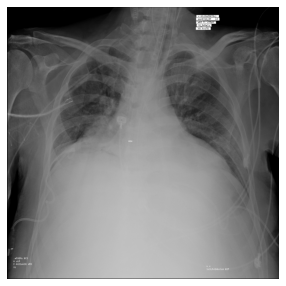

In [21]:
show_image(ob[0][3,:])

In [22]:
dls.c = 1

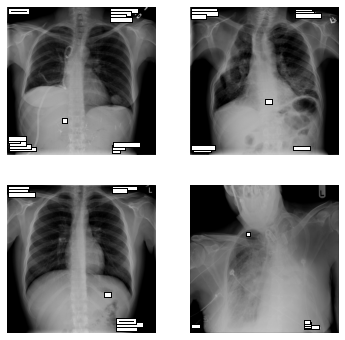

In [23]:
dls.show_batch()

# The Model

The architecture we are going to use is called `RetinaNet`. I've exported this all myself for you guys to use quickly, if you want to explore what's going on in the code I'd recommend the Object Detection lesson [here](https://www.youtube.com/watch?v=Z0ssNAbe81M&t=4496s)

Let's clone my repo and work out of it

In [24]:
# !git clone https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0.git
# %cd "Practical-Deep-Learning-for-Coders-2.0/Computer Vision"

In [25]:
from imports import *

We're still going to use transfer learning here by creating an `encoder` (body) of our model and a head

In [26]:
encoder = create_body(resnet34, pretrained=False)

Now that we have our encoder, we can call the `RetinaNet` architecture. We'll pass in the encoder, the number of classes, and what we want our final bias to be on the last convolutional layer (how we initialize our model). Jeremy has his example at -4 so let's use this

In [27]:
get_c(dls)

1

In [28]:
arch = RetinaNet(encoder, (h,w), get_c(dls), final_bias=-4)

Another big difference is the head of our model. Instead of our linear layers with pooling layers:

In [29]:
create_head(124, 4)

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(248, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=248, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=4, bias=False)
)

We have one with a smoother, a classifer, and a `box_regressor` (to get our points)

In [30]:
arch.smoothers

ModuleList(
  (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [31]:
arch.classifier

Sequential(
  (0): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (1): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (2): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (3): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (4): Conv2d(256, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [32]:
arch.box_regressor

Sequential(
  (0): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (1): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (2): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (3): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (4): Conv2d(256, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

## Loss Function
Now we can move onto our loss function. For RetinaNet to work, we need to define what the aspect ratio's and scales of our image should be. The paper used [1,2**(1/3), 2**(2/3)], but they also used an image size of 600 pixels, so even the largest feature map (box) gave anchors that covered less than the image. But for us it would go over. As such we will use -1/3 and -2/3 instead. We will need these for inference later!

In [29]:
ratios = [1/2,1,2]
#scales = [1,2**(-1/3), 2**(-2/3)]
scales=[1,2**(1/3), 2**(2/3)]

Let's make our loss function, which is `RetinaNetFocalLoss`

In [30]:
crit = RetinaNetFocalLoss(arch, scales=scales, ratios=ratios)

Now let's make our `Learner`!

We want to freeze our `encoder` and keep everything else unfrozen to start

In [31]:
def _retinanet_split(m): return L(m.encoder,nn.Sequential(m.c5top6, m.p6top7, m.merges, m.smoothers, m.classifier, m.box_regressor)).map(params)

In [32]:
learn = Learner(dls, arch, loss_func=crit, splitter=_retinanet_split)

In [33]:
learn.freeze()

In [34]:
learn.summary()

RetinaNet (Input shape: 4)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 512 x 512  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                        

We can see it was split and frozen by looking at the summary!

Now let's train!

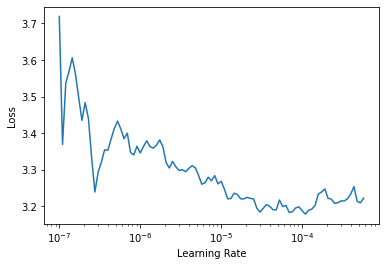

In [35]:
lr_sugg = learn.lr_find(end_lr = 10e-4)

In [36]:
lr_sugg

SuggestedLRs(lr_min=1.0964782268274575e-05, lr_steep=2.5118865210060903e-07)

In [37]:
learn.fit_one_cycle(5, slice(lr_sugg.lr_steep, lr_sugg.lr_min))

epoch,train_loss,valid_loss,time
0,2.953547,2.895650,03:19
1,2.807598,2.713704,03:21
2,2.724556,2.825246,03:19
3,2.696456,2.653978,03:23
4,2.653524,2.691865,03:18


In [38]:
learn.save('test-1024')

Path('models/test-1024.pth')

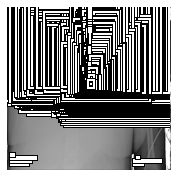

In [46]:
learn.show_results(max_n=1)

In [63]:
import torchvision

o = list(iter(dls.valid_ds))
 
print(type(o))
print(o)

#img = torchvision.transforms.ToTensor()(o[0][0])
#print(img[None,...].shape)

# with torch.no_grad():
#      output = learn.model(o)
        

<class 'list'>
[(PILImage mode=RGB size=1024x1024, TensorBBox([[ 14.,  23.,  39.,  33.],
        [ 13.,  41., 138.,  56.],
        [ 14.,  63.,  47.,  74.],
        [ 14.,  83.,  93.,  96.],
        [725.,  22., 848.,  34.],
        [726.,  41., 866.,  53.],
        [ 31., 980., 164., 992.],
        [ 32., 959., 182., 973.],
        [ 32., 939.,  66., 950.],
        [ 40., 919.,  48., 929.],
        [ 32., 899.,  66., 909.],
        [773., 987., 940., 999.],
        [769., 470., 777., 480.]]), TensorMultiCategory([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])), (PILImage mode=RGB size=1024x1024, TensorBBox([[ 12.,  21.,  29.,  32.],
        [ 11.,  44.,  39.,  56.],
        [ 12.,  67., 109.,  81.],
        [ 14.,  91.,  49., 102.],
        [ 12., 112., 199., 128.],
        [ 24., 973., 100., 985.],
        [ 23., 952., 200., 965.],
        [ 32., 931., 180., 945.],
        [ 22., 911., 140., 925.],
        [ 23., 890., 120., 904.],
        [791., 974., 848., 987.],
        [447., 619., 464.

In [79]:
print(output)

[tensor([[[ 0.2074, -0.1085,  0.6069, -1.3443],
         [-0.1481,  0.1247,  0.1913, -0.7398],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.0036,  0.0041,  0.0297, -0.0676],
         [-0.0090, -0.0117,  0.0486, -0.0211],
         [-0.0117,  0.0074,  0.0332, -0.0803]]], device='cuda:0'), tensor([[[-6.0103],
         [-5.3201],
         [-6.5690],
         ...,
         [-4.0086],
         [-4.0203],
         [-4.0197]]], device='cuda:0')]


In [48]:
learn.predict(output[0].cpu())

TypeError: Cannot handle this data type: (1, 1, 4), <f4

In [ ]:
output

In [ ]:
dls.valid_ds[0][0]

In [ ]:
learn.export()

In [98]:
outputs = []
with torch.no_grad():
    for data, bbox, cls in dls.valid_ds:
        data = torchvision.transforms.ToTensor()(data)
        data= torch.unsqueeze(data, 0).cuda()
#         print(data)
        output = learn.model(data)
        outputs.append(output)

In [ ]:
print(output)

In [69]:
img, bboc, cls = next(iter(dls.valid_ds))

with torch.no_grad():
    output = learn.model(torchvision.transforms.ToTensor()())

TypeError: 'PILImage' object is not subscriptable

In [ ]:
output

In [ ]:
o[0][0]

In [ ]:
show_image(img)

In [ ]:
idx=0
#print(dls.train_ds[idx][0])
print(output[1])

In [113]:
idx = 0
img = dls.train_ds[idx][0]
show_preds(img, outputs, idx, scales, ratios, detect_thresh=0.5, classes=1)

IndexError: The shape of the mask [1, 4] at index 1 does not match the shape of the indexed tensor [1, 749376, 4] at index 1

In [114]:
resnet = models.resnet50()

In [115]:
children_count = 0
for n, c in resnet.named_children():
    print('children counter: ',children_count, 'Layer name: ', n)
    children_count +=1

children counter:  0 Layer name:  conv1
children counter:  1 Layer name:  bn1
children counter:  2 Layer name:  relu
children counter:  3 Layer name:  maxpool
children counter:  4 Layer name:  layer1
children counter:  5 Layer name:  layer2
children counter:  6 Layer name:  layer3
children counter:  7 Layer name:  layer4
children counter:  8 Layer name:  avgpool
children counter:  9 Layer name:  fc


In [116]:
resnet._modules

OrderedDict([('conv1',
              Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)),
             ('bn1',
              BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)),
             ('relu', ReLU(inplace=True)),
             ('maxpool',
              MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)),
             ('layer1',
              Sequential(
                (0): Bottleneck(
                  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (bn3): BatchN

In [ ]:
resnet.add_module()

In [118]:
encoder = create_body(resnet34, pretrained=False)

In [119]:
model = RetinaNet(encoder, (h,w), get_c(dls), final_bias=-4)

In [134]:
model._modules.keys()

odict_keys(['encoder', 'c5top5', 'c5top6', 'p6top7', 'merges', 'smoothers', 'classifier', 'box_regressor'])

In [142]:
model._modules

OrderedDict([('encoder',
              Sequential(
                (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): ReLU(inplace=True)
                (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                (4): Sequential(
                  (0): BasicBlock(
                    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (relu): ReLU(inplace=True)
                    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  )
                  (1): BasicBlock(
                

In [141]:
model._modules['c5top6']

Conv2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))